# Plotting Contours of Scalarization Functions

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from deephyper.skopt.moo import MoLinearFunction, MoQuadraticFunction, MoPBIFunction, MoAugmentedChebyshevFunction, MoChebyshevFunction


# number of points to be used for plotting
n_points = 200

# the xlim
P = np.linspace(0, 1, n_points)
X = np.array(np.meshgrid(P, P)).reshape(2, -1).T

def plot_contour(X, F, ax=None):
    _X = X[:, 0].reshape((n_points,n_points))
    _Y = X[:, 1].reshape((n_points,n_points))
    _Z = F.reshape((n_points,n_points))

    if ax is None:
        fig, ax = plt.subplots()

    ax.contour(_X,_Y, _Z, levels=14, colors='black')
    ax.arrow(0, 0, 0.8, 0.8, color='blue', head_width=0.1, head_length=0.1, alpha=0.4)
    ax.set_aspect('equal')

def do_scalarization(scaler, F):
    scaler.normalize(F)
    y = np.asarray([scaler.scalarize(f) for f in F])
    return y

### Linear

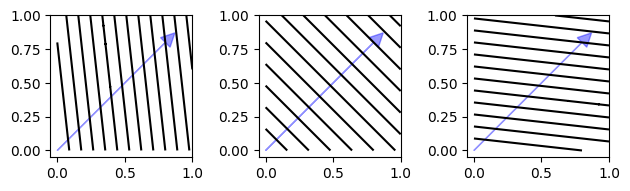

In [6]:
plt.figure()

ax = plt.subplot(1, 3, 1)
w = [0.9, 0.1]
scaler = MoLinearFunction(n_objectives=2, weight=w)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

ax = plt.subplot(1, 3, 2)
w = [0.5, 0.5]
scaler = MoLinearFunction(n_objectives=2, weight=w)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

ax = plt.subplot(1, 3, 3)
w = [0.1, 0.9]
scaler = MoLinearFunction(n_objectives=2, weight=w)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

plt.tight_layout()
plt.show()

## Quadratic

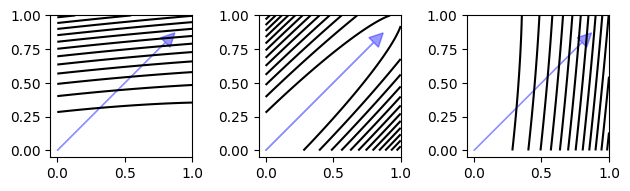

In [15]:
# alpha manipulates the "openess" of the quadratic function
# a large alpha makes it more concave (less open), alpha=50.0
# a small alpha makes it more open
alpha = 50.0 # (large)
# alpha = 10.0 # (default)
# alpha = 5.0 # (small)

plt.figure()

ax = plt.subplot(1, 3, 1)
w = [0.9, 0.1]
scaler = MoQuadraticFunction(n_objectives=2, weight=w, alpha=alpha)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

ax = plt.subplot(1, 3, 2)
w = [0.5, 0.5]
scaler = MoQuadraticFunction(n_objectives=2, weight=w, alpha=alpha)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

ax = plt.subplot(1, 3, 3)
w = [0.1, 0.9]
scaler = MoQuadraticFunction(n_objectives=2, weight=w, alpha=alpha)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

plt.tight_layout()
plt.show()

## Chebyshev

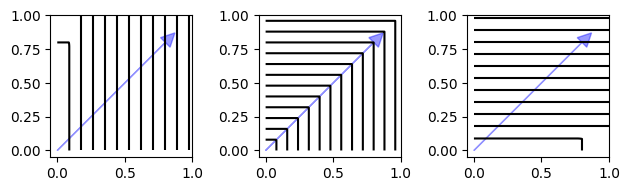

In [8]:
plt.figure()

ax = plt.subplot(1, 3, 1)
w = [0.9, 0.1]
scaler = MoChebyshevFunction(n_objectives=2, weight=w)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

ax = plt.subplot(1, 3, 2)
w = [0.5, 0.5]
scaler = MoChebyshevFunction(n_objectives=2, weight=w)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

ax = plt.subplot(1, 3, 3)
w = [0.1, 0.9]
scaler = MoChebyshevFunction(n_objectives=2, weight=w)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

plt.tight_layout()
plt.show()

## Augmented Chebyshev

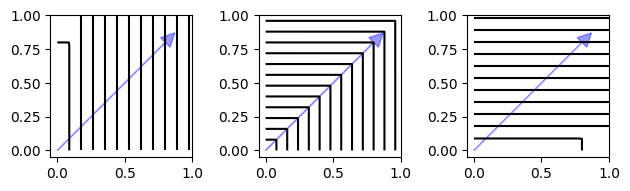

In [18]:
# alpha manages the opening of the "angle"
# a small alpha (0.001) makes the corner closer to chebychev function
# a large alpha (0.5) makes the corner wide
# alpha = 0.001 # (default)
alpha = 0.0001
# alpha = 0.5

plt.figure()

ax = plt.subplot(1, 3, 1)
w = [0.9, 0.1]
scaler = MoAugmentedChebyshevFunction(n_objectives=2, weight=w, alpha=alpha)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

ax = plt.subplot(1, 3, 2)
w = [0.5, 0.5]
scaler = MoAugmentedChebyshevFunction(n_objectives=2, weight=w, alpha=alpha)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

ax = plt.subplot(1, 3, 3)
w = [0.1, 0.9]
scaler = MoAugmentedChebyshevFunction(n_objectives=2, weight=w, alpha=alpha)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

plt.tight_layout()
plt.show()

## PBI

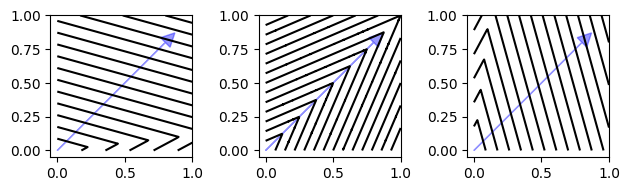

In [17]:
# penalty is the penalty factor for the PBI function
# penalty = 100.0 # (default)
# penalty = 15.0
penalty = 2.5
# penalty = 1.0 # small (look a bit like chebychev)

plt.figure()

ax = plt.subplot(1, 3, 1)
w = [0.9, 0.1]
scaler = MoPBIFunction(n_objectives=2, weight=w, penalty=penalty)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

ax = plt.subplot(1, 3, 2)
w = [0.5, 0.5]
scaler = MoPBIFunction(n_objectives=2, weight=w, penalty=penalty)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

ax = plt.subplot(1, 3, 3)
w = [0.1, 0.9]
scaler = MoPBIFunction(n_objectives=2, weight=w, penalty=penalty)
plot_contour(X, do_scalarization(scaler, X), ax=ax)

plt.tight_layout()
plt.show()